# ORIE 4580/5580/5581 Assignment 3

#### Students: Maddi Klancher (mrk256) and Sofia Paredes (smp343)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [8]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
import math

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)

def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) % (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m
        
    return output

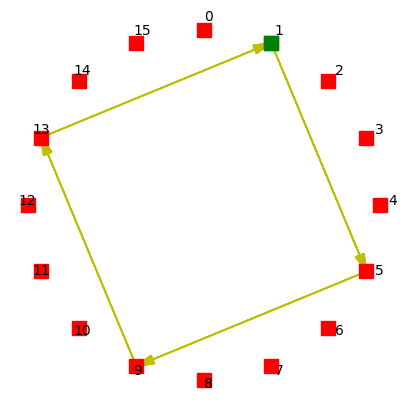

In [4]:
# Ans

# x: x_n+1 = (5x_n) mod 16

m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

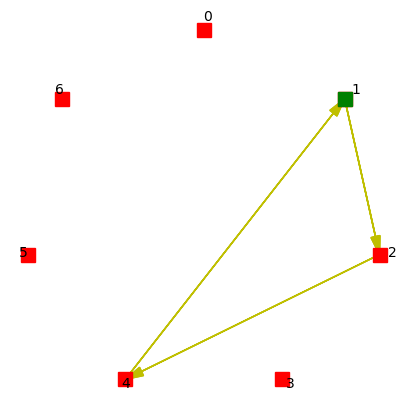

In [5]:
# y: y_n+1 = (2y_n) mod 7

m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
y = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,y,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

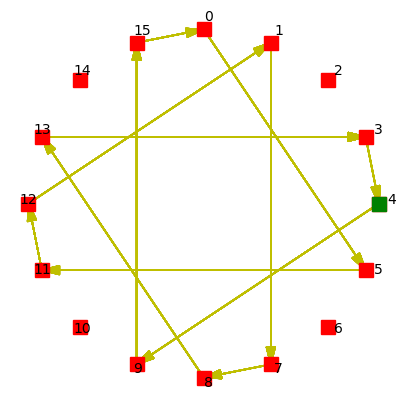

In [6]:
# z_n+1: (x_n) + (y_n) = [(5x_n) mod 16] + [(2y_n) mod 7]

# x
m_x = 16**2
a_x = 5
c_x = 0
seed = 1

x = LCG(n=m_x+1,m=m_x,a=a_x,c=c_x,seed = seed)

# y
m_y = 7
a_y = 2
c_y = 0

y = LCG(n=m_x+1,m=m_y,a=a_y,c=c_y,seed = seed)

# z = (x_n + y_n mod 16)

m_z = 16

z = (x + y) % 16

w = (z + 1)/(m_z+1)


fig = plt.figure(figsize=(5,5))

plot_clock_face(m_z,fig,annotate = True)
plot_clock_path(m_z,w,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.
$x_n$ = 4 
$y_n$ = 3 
$z_n$ = 12

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

The pseudoinverse $F^{-1}(y)$ for the above cdf is: 

$$F^{-1}(y) = 
\begin{cases} 
undefined & \mbox{for $y < 0$}\\
y & \mbox{for $0 \leq y < \frac{1}{2}$}, \\
1 & \mbox{for $y \geq \frac{1}{2}$}
\end{cases}$$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

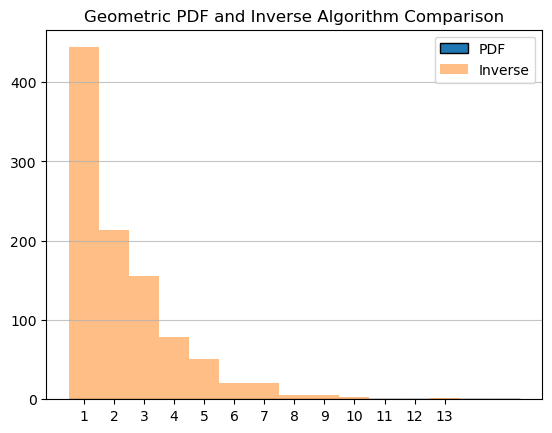

In [88]:
#inverting the cdf --> x = log(base(1-p))(1-y) = (ln(1-y))/(ln(1-p))

p = .42
inverse = []
for i in range(1000):
    u = scipy.stats.uniform.rvs()
    x = ((np.log(1-u))/(np.log(1-p)))
    inverse.append(math.ceil(x))
    
geo = scipy.stats.geom.rvs(p, size = 1000)
geo_bins = np.arange(1, max(geo) + 2) - .5
inverse_bins = np.arange(1, max(inverse) + 2) - .5

plt.hist(geo, bins = geo_bins, density = True, alpha = 1, label = 'PDF', edgecolor = 'Black')
plt.hist(inverse, bins = inverse_bins, label = 'Inverse', alpha = .5)
plt.xticks(np.arange(1, max(inverse) + 1))
plt.grid(axis = 'y', alpha = .75)
plt.title('Geometric PDF and Inverse Algorithm Comparison')
plt.legend()
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

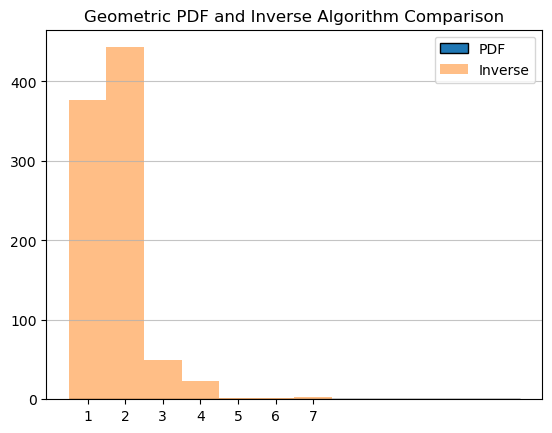

In [89]:
#F^-1 = ln(y*e^2 + 1) 0 <= y <= 1 - e^(-2) 
        #-ln(1-y)    y > 1 - (e^-2)
    
#u ~ [0,1]
#if u < 1 - e^(-2) --> ln(y*e^2 + 1)
#else --> -ln(1-y)

p = .42
inverse = []
for i in range(1000):
    u = scipy.stats.uniform.rvs()
    if u < 1 - np.exp(-2):
        value = np.log(u * np.exp(2) + 1)
    else:
        value = (-1)*np.log(1 - u)
    inverse.append(value)
        
geo = scipy.stats.geom.rvs(p, size = 1000)
geo_bins = np.arange(1, max(geo) + 2) - .5
inverse_bins = np.arange(1, max(inverse) + 2) - .5

plt.hist(geo, bins = geo_bins, density = True, alpha = 1, label = 'PDF', edgecolor = 'Black')
plt.hist(inverse, bins = inverse_bins, label = 'Inverse', alpha = .5)
plt.xticks(np.arange(1, max(inverse) + 1))
plt.grid(axis = 'y', alpha = .75)
plt.title('Geometric PDF and Inverse Algorithm Comparison')
plt.legend()
plt.show()

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


In [43]:
def pdf(x):
    if 0 <= x <= 1:
        return((5*x**4 + 4*x**3 + 3*x**2 + 1)/4)
    else:
        return(0)

In [45]:
n = 1000
samples = []

M = 3.3

while len(samples) < n:
    u1 = np.random.uniform()
    u2 = np.random.uniform()
    z1 = u1
    z2 = M*u2 
    if z2 <= pdf(z1):
        samples.append(z1)

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

### Ans.


In [48]:
num = 1
counter = []

for i in range(1000):
    samples = []
    count = 0 
    while len(samples) < num: #samples only increases if it's accepted 
        count += 1 #each time you need to test 
        u1 = np.random.uniform()
        u2 = np.random.uniform()
        z1 = u1
        z2 = M*u2 
        if z2 <= pdf(z1):
            samples.append(z1)
            counter.append(count) #number of times that we had to test before acceptance
            
print(2 * np.mean(counter))
        

6.632


By the definitions of the acceptance-rejection method, the expected value of the number of samples of $U[0,1]$ is $2*M*(b-a)$. Given that $M = 3.3$, $b = 1$ and $a = 0$, the expected value is 6.6. The above algorithm (with 1000 simulations) yields a number similar. 

___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


In [49]:
#n = number of samples
def accept_reject(M, n):
    samples = []
    while len(samples) < n:
        u1 = np.random.uniform()
        u2 = np.random.uniform()
        z1 = u1 
        z2 = M*u2
        if z2 <= pdf(z1):
            samples.append(z1)
            
    return(samples)

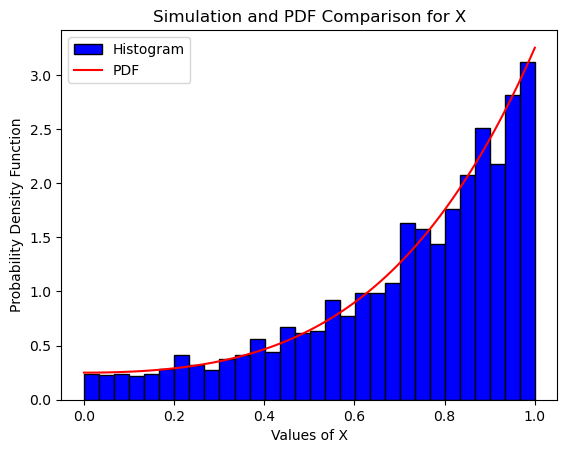

In [58]:
samples = accept_reject(M = 3.3, n = 2500)
plt.hist(samples, bins = 30, density = True, color = 'b', edgecolor = 'black', label = 'Histogram')
x = np.linspace(0,1, 101)
pdfs = [pdf(value) for value in x]
plt.plot(x, pdfs, 'r-', label = 'PDF')
plt.xlabel('Values of X')
plt.ylabel('Probability Density Function')
plt.title('Simulation and PDF Comparison for X')
plt.legend()
plt.show()

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

We will generate samples from the proposed distribution $g(x)$ using the inversion method. The generated samples will later be compared to the true pdf of the proposal distribution for validation. 

First, calculate the CDF G(x) from the given PDF: $g(x) = \frac{e^{-|x|}}{2}$

CDF: $G(x) = \int_{-\inf}^{x} \frac{e^{-|x|}}{2} \,dx \$

$ = \frac{e^{-|x|}}{2}$ from $-\inf$ to $x$

$ 1 - \frac{e^{-x}}{2}$

We invert $G(x)$ to find x as a function of a uniform variable $u$ between $[0,1]$ where
$x(u) = G^{-1}(u)$

Inverse function $F^{-1}(u)$ is the value of x that corresponds to $G(x) = u$

The laplace distribution is not symetric around zero, so the inverse CFD behaves differently based on the generated uniform random variable.

When $u < 0.5: F^{-1}(u) = ln(2u))$ 

When $u \geq 0.5: F^{-1}(u) = -ln(2-2u))$ 

To return $x_i$ for each $u_i$, we generate $N$ random samples samples $u_i$ then use $G^{-1}(u_i)$ to take the inversion of each $u_i$

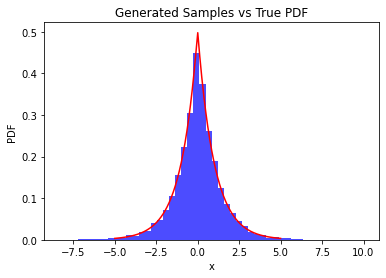

In [50]:
N = 10000

# normal PDF
def pdf_normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# laplace PDF
def pdf_laplace(x):
        return np.exp(-np.abs(x))/2

    
# generate inverse CDF for laplace distribution
def inverse_cdf_laplace(u):
    if u < 0.5:
        return np.log(2*u)
    else: 
        return -np.log(2-2*u)

# generate uniform random variables between [0,1]
u = np.random.rand(N)

# use inversion to get samples from the Laplace distribution
samples = [inverse_cdf_laplace(i) for i in u]

# plot a historgram of generated samples
plt.hist(samples, bins=50, density=True, alpha=0.7, color='b', label='Generated Samples')

x = np.linspace(-5,5,1000)
g_x = pdf_laplace(x)

plt.plot(x,g_x,'r',label='True PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend
plt.title('Generated Samples vs True PDF')
plt.show()
        
    
    

Now that we have samples from the proposed distribution, we can implement the generalized acceptance-rejection method to generate samples from $f(x)$ using $g(x)$

___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.

$x$ is an increasing function in the CDF $G(x)$

$k \geq \frac{f(x)}{g(x)} = \frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{\frac{e^{-|x|}}{2}}$

$k \geq \sqrt{\frac{2e}{\pi}}e^{\frac{-(|x|-1)^{2}}{2}}$

Minimize k by taking the maximum of $\frac{f(x)}{g(x)}$

By taking the derivative of the exponent, the maximum is at $-x + 1 = 0$

Therefore, maximum $\frac{f(x)}{g(x)}$ at $x=1$

$k \geq \sqrt{\frac{2e}{\pi}}$

Acceptance - Rejection Algorithm: 

1. Generate a random sample U from a uniform distribution over [0,1]
2. Generate a random sample Y from the Laplace distribution
3. Calculate the acceptance threshold: 
   Accept x with probability $\frac{f(x)}{k * g(x)}$
4. Count number of trials
5. Accept or reject the sample

In [140]:
k = np.sqrt(2*np.e/np.pi)
N = 1000
samples = []
count = 0
trial_count = []
total_count = 0

# normal PDF: f(x)
def pdf_normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# laplace PDF: g(x)
def pdf_laplace(x):
        return np.exp(-np.abs(x))/2

# Acceptance Rejection Sampling
while len(samples) < N:
    
    # 1. random sample U from uniform distribution
    U = np.random.rand()
    
    # 2. random sample Y from laplace distribution
    Y = np.random.laplace()

    # 3. Acceptance threshold:
    threshold = pdf_normal(Y) / (k*pdf_laplace(Y))
    
    # 4. count trial
    count += 1
    total_count += 1
    
    # 5. Accept or reject sample
    if U <= threshold:
        # accepted
        samples.append(Y)
        trial_count.append(count)
        count = 0
            

# compute the average number of trials per sample 
mean = np.mean(trial_count)
print("Expected number of samples needed to generate each sample: ", mean)

Expected number of samples needed to generate each sample:  1.348


___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

In [161]:
k = np.sqrt(2*np.e/np.pi)
N = 1000
samples = []
alpha = 0.95
total_count = 0
num_samples = []


# normal PDF
def pdf_normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# laplace PDF
def pdf_laplace(x):
        return np.exp(-np.abs(x))/2

# Acceptance Rejection Sampling
for i in range(100): 
    
    total_count = 0
    samples = []
    
    while len(samples) < N:
        
        # 1. random sample U from uniform distribution
        U = np.random.rand()

        # 2. random sample Y from laplace distribution
        Y = np.random.laplace()

        # 3. Acceptance threshold:
        threshold = pdf_normal(Y) / (k*pdf_laplace(Y))

        # 4. count trial
        total_count += 1

        # 5. Accept or reject sample
        if U <= threshold:
            # accepted
            samples.append(Y)
            count = 0
           
    num_samples.append(total_count)
    
# compute the average number of trials per sample
mean = np.mean(num_samples)
print("Average number of samples to generate the 1000 samples: ", mean)

Average number of samples to generate the 1000 samples:  1315.51


95% Confidence Interval: [ 1311.3845653804735 , 1319.6354346195264 ]


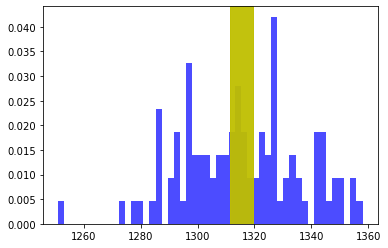

In [166]:
# calculate the z-score for the given confidence level alpha
z = scipy.stats.norm.ppf(0.5 + alpha / 2.0)

# calculate the half-width of the CI
half_width_alpha = z * np.std(num_samples, ddof=1) / np.sqrt(len(num_samples))

# calculate the upper and lower bounds of the CI
ucb = mean + half_width_alpha
lcb = mean - half_width_alpha
print("95% Confidence Interval: [", lcb, ",", ucb, "]")

# Plot the confidence interval as a yellow shaded region
# plot a historgram of generated samples
plt.hist(num_samples, bins=50, density=True, alpha=0.7, color='b', label='Generated Samples')
plt.axvspan(lcb, ucb, alpha=0.95, color='y', label=f'{int(alpha*100)}% confidence interval')

___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

We will generate samples from the proposed distribution $g(x)$ using the inversion method. The generated samples will later be compared to the true pdf of the proposal distribution for validation. 

First, calculate the CDF G(x) from the given PDF: $g(x) = \frac{1}{\pi(1+x^2)}$

CDF: $G(x) = \int_{-\inf}^{x} \frac{1}{\pi(1+x^2)} \,dx \$

$ G(x) = \frac{1}{\pi} arctan(x) + \frac{1}{2}$



We invert $G(x)$ to find x as a function of a uniform variable $u$ between $[0,1]$ where
$x(u) = G^{-1}(u)$

Inverse function $F^{-1}(u)$ is the value of x that corresponds to $G(x) = u$

$F^{-1}(u) = tan(\pi(u-\frac{1}{2}))$

To return $x_i$ for each $u_i$, we generate $N$ random samples samples $u_i$ then use $G^{-1}(u_i)$ to take the inversion of each $u_i$

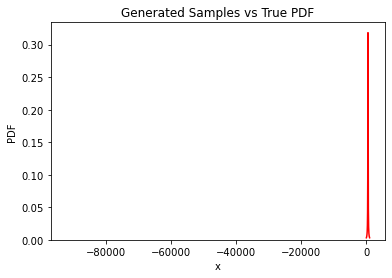

In [190]:
N = 10000

# normal PDF: f(x)
def pdf_normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# cauchy PDF: g(x)
def pdf_cauchy(x):
    return 1/(np.pi*(1+x**2))

    
# generate inverse CDF for laplace distribution
def inverse_cdf_cauchy(u):
    return np.tan(np.pi*(u-0.5))

# generate uniform random variables between [0,1]
u = np.random.rand(N)

# use inversion to get samples from the cauchy distribution
samples = inverse_cdf_cauchy(u)

# plot a historgram of generated samples
plt.hist(samples, bins=10, density=True,  alpha=0.7, color='b', label='Generated Samples')

#x = np.linspace(-10,10,1000)
g_x = pdf_cauchy(x)

plt.plot(g_x,'r',label='True PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend
plt.title('Generated Samples vs True PDF')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

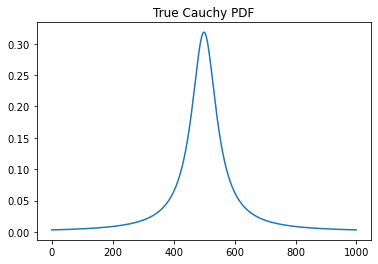

In [184]:
plt.plot(g_x)
plt.title('True Cauchy PDF')
plt.show

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

$x$ is an increasing function in the CDF $G(x)$

$k \geq \frac{f(x)}{g(x)} = \frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{\frac{1}{\pi(1+x^2)}}$

Simplifies to $k \geq \frac{1}{\sqrt{2\pi}}$


### Ans.

In [197]:
k = 1/np.sqrt(2*np.pi)
N = 1000
samples = []
alpha = 0.95
total_count = 0
num_samples = []


# normal PDF
def pdf_normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# cauchy PDF
def pdf_cauchy(x):
    return 1/(np.pi*(1+x**2))

# Acceptance Rejection Sampling
for i in range(100): 
    
    total_count = 0
    samples = []
    
    while len(samples) < N:
        
        # 1. random sample U from uniform distribution
        U = np.random.rand()

        # 2. random sample Y from cauchy distribution
        Y = np.random.standard_cauchy()

        # 3. Acceptance threshold:
        threshold = pdf_normal(Y) / (k*pdf_cauchy(Y))

        # 4. count trial
        total_count += 1

        # 5. Accept or reject sample
        if U <= threshold:
            # accepted
            samples.append(Y)
            count = 0
           
    num_samples.append(total_count)
    
# compute the average number of trials per sample
mean = np.mean(num_samples)
print("Average number of samples to generate the 1000 samples: ", mean)

Average number of samples to generate the 1000 samples:  1266.62


95% Confidence Interval: [ 1262.9422772564023 , 1270.2977227435974 ]


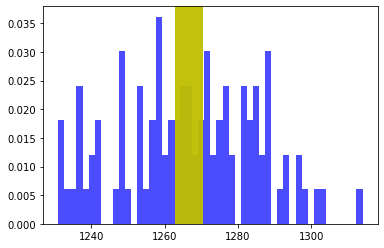

In [198]:
# calculate the z-score for the given confidence level alpha
z = scipy.stats.norm.ppf(0.5 + alpha / 2.0)

# calculate the half-width of the CI
half_width_alpha = z * np.std(num_samples, ddof=1) / np.sqrt(len(num_samples))

# calculate the upper and lower bounds of the CI
ucb = mean + half_width_alpha
lcb = mean - half_width_alpha
print("95% Confidence Interval: [", lcb, ",", ucb, "]")

# Plot the confidence interval as a yellow shaded region
# plot a historgram of generated samples
plt.hist(num_samples, bins=50, density=True, alpha=0.7, color='b', label='Generated Samples')
plt.axvspan(lcb, ucb, alpha=0.95, color='y', label=f'{int(alpha*100)}% confidence interval')